<a href="https://colab.research.google.com/github/Vreddy0305/Machine-Learning-ML-/blob/main/LAB5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4.8679990917792875 2.2063542534641365 0.7558010670389662 0.8911128068054599
4.615961082013142 2.148478783235511 0.7511742814778952 0.8898170359356072
1.267907927098922
1.238766870948297
[0 0 0 ... 0 0 0]
[[2.02296968e+01 2.26100113e-04 3.43861794e+01]
 [2.16150413e+01 6.94214876e-03 4.93583471e+01]]
0.9393047183237913
45981.4604228738
0.2924802951453581
[(2, np.float64(0.9393047183237913), np.float64(45981.4604228738), np.float64(0.2924802951453581)), (3, np.float64(0.9185098794788434), np.float64(41694.036346306326), np.float64(0.469452161025673)), (4, np.float64(0.5830693679341239), np.float64(45756.88020713239), np.float64(0.5604728425619887)), (5, np.float64(0.5930101491155287), np.float64(58224.30139172258), np.float64(0.5054249731158653))]


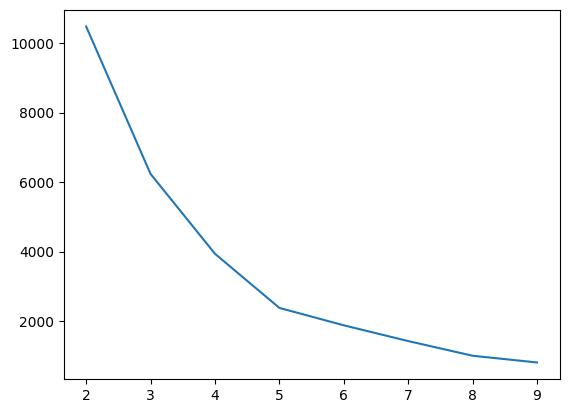

In [3]:
# A1
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import numpy as np

data = pd.read_csv("/content/merged_clean_dataset (1).csv")
X = data[['Gage_Height_ft']]
y = data['Stream_Flow_cfs']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# A2
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(mse_train, rmse_train, mape_train, r2_train)
print(mse_test, rmse_test, mape_test, r2_test)

# A3
X = data[['Gage_Height_ft','Precipitation_in','Reservoir_Storage_acre_ft']]
y = data['Stream_Flow_cfs']

# Impute missing values before splitting the data
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = imputer.fit_transform(X)
X_imputed = pd.DataFrame(X_imputed, columns=X.columns) # Convert back to DataFrame

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=1)
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(mean_squared_error(y_train, y_train_pred))
print(mean_squared_error(y_test, y_test_pred))

# A4
from sklearn.cluster import KMeans

# Impute missing values for clustering as well
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = imputer.fit_transform(data[['Gage_Height_ft','Precipitation_in','Reservoir_Storage_acre_ft']])
X_imputed = pd.DataFrame(X_imputed, columns=['Gage_Height_ft','Precipitation_in','Reservoir_Storage_acre_ft']) # Convert back to DataFrame

kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)
kmeans.fit(X_imputed)
print(kmeans.labels_)
print(kmeans.cluster_centers_)

# A5
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

print(silhouette_score(X_imputed, kmeans.labels_))
print(calinski_harabasz_score(X_imputed, kmeans.labels_))
print(davies_bouldin_score(X_imputed, kmeans.labels_))

# A6
scores = []
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10).fit(X_imputed)
    s = silhouette_score(X_imputed, kmeans.labels_)
    c = calinski_harabasz_score(X_imputed, kmeans.labels_)
    d = davies_bouldin_score(X_imputed, kmeans.labels_)
    scores.append((k, s, c, d))
print(scores)

# A7
import matplotlib.pyplot as plt

distortions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10).fit(X_imputed)
    distortions.append(kmeans.inertia_)
plt.plot(range(2, 10), distortions)
plt.show()